In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:

# Load data
df = pd.read_csv("MAIN grant-all-20250504-072306.csv")
df.head()

,Title,Grant Amount,Grant Term Start,Grant Term End,Description,Initiative,Grant Status,Grantee Address
0,New York Botanical Garden 2025,500000.0,2025-05-01,2028-04-30,in support of integrating regenerative mixed c...,Food Initiative,NaN,"2900 Southern Boulevard, Bronx, NY 10458, Unit..."
1,American Heart Association 2025,500000.0,2025-05-01,2026-04-30,in support of the Periodic Table of Food Initi...,Food Initiative,NaN,"7272 Greenville Avenue, Dallas, TX 75231, Unit..."
2,Bioversity International 2025,250100.0,2025-05-01,2025-12-31,in support of expanding indigenous food system...,Food Initiative,NaN,"Via di S. Domenico 1, Roma, 00153, Italy"
3,Rocky Mountain Institute/RMI 2025,1500000.0,2025-04-01,2026-03-31,in support of transitioning planned coal asset...,Power and Climate,NaN,"2490 Junction Place, Suite 200, Boulder, CO 80..."
4,Global Resilient Cities Network 2025,600000.0,2025-04-01,2027-05-31,in support of strengthening the climate resili...,Strategic Opportunities Fund,NaN,"28 Liberty Street, 34th Floor, New York, NY 10..."


# Data Cleaning and Preprocessing

In [3]:
# Fill missing values
df['Grant Status'] = df['Grant Status'].fillna('Unknown')

# Drop rows with missing essential fields
df.dropna(subset=['Title', 'Description'], inplace=True)

# Convert columns to appropriate datatypes
df['Grant Amount'] = df['Grant Amount'].astype(float)
df['Grant Term Start'] = pd.to_datetime(df['Grant Term Start'])
df['Grant Term End'] = pd.to_datetime(df['Grant Term End'])

# Remove duplicates
df = df.drop_duplicates()

#  Save Structured Data to CSV

In [4]:
# Save cleaned structured dataset
df.to_csv("cleaned_grants_dataset.csv", index=False)

# Process Unstructured data 

In [5]:
# Vectorize using CountVectorizer with built-in English stopwords
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Description'])

# Get word frequencies
word_freq = np.array(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Create frequency DataFrame
common_words = pd.DataFrame({'word': words, 'frequency': word_freq})
common_words = common_words.sort_values(by='frequency', ascending=False).head(20)

# EDA: Structured Data

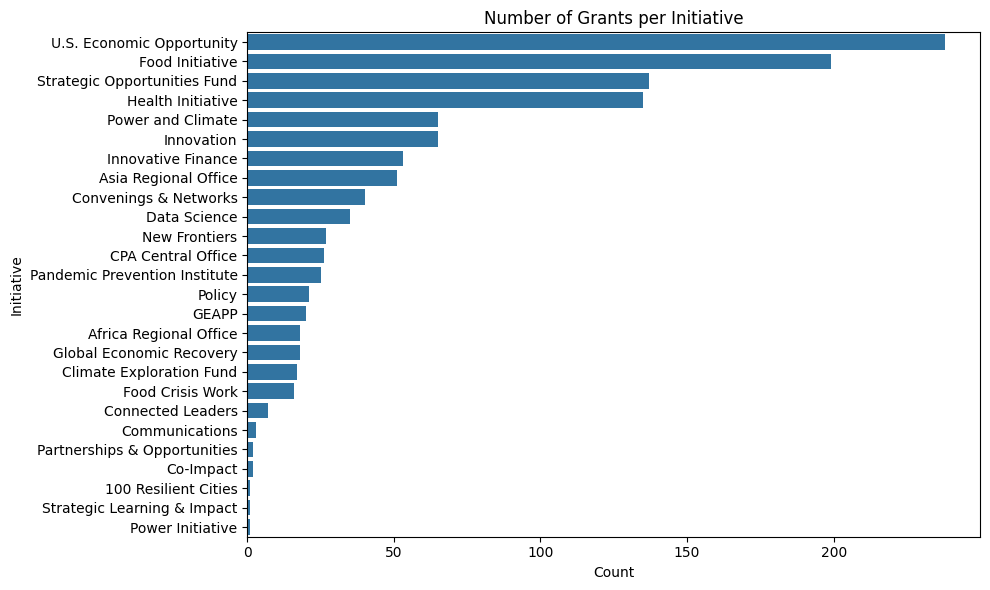

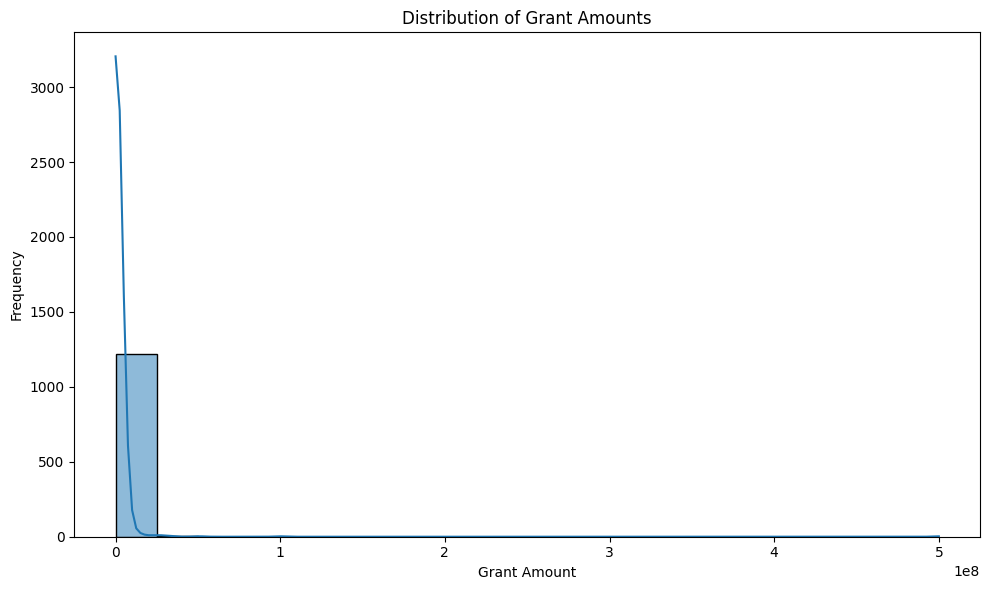

In [6]:
# Grants per Initiative
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Initiative', order=df['Initiative'].value_counts().index)
plt.title("Number of Grants per Initiative")
plt.xlabel("Count")
plt.ylabel("Initiative")
plt.tight_layout()
plt.show()

#Grant Amount Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Grant Amount'], bins=20, kde=True)
plt.title("Distribution of Grant Amounts")
plt.xlabel("Grant Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Text Analysis of Descriptions

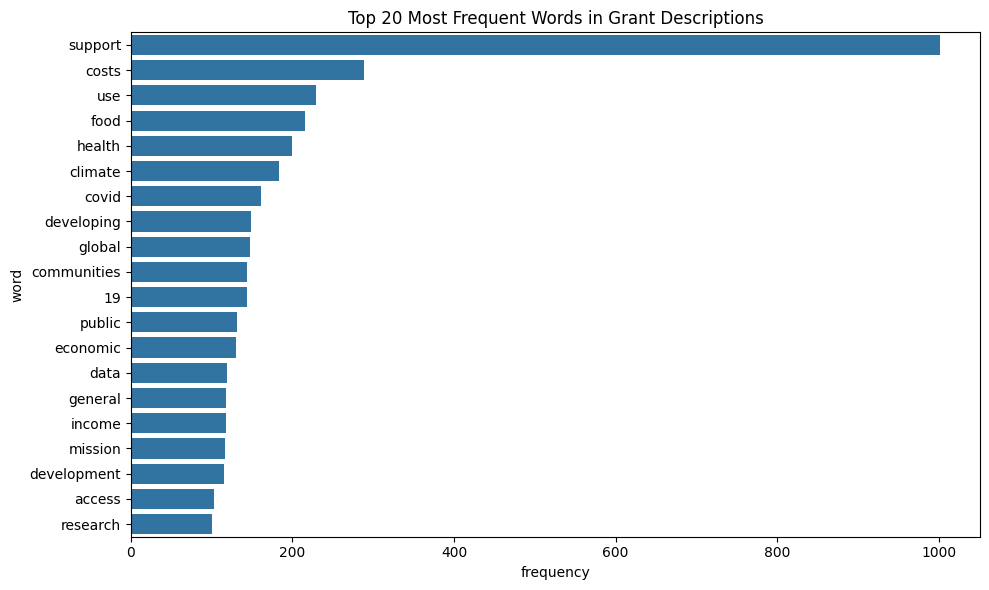

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=common_words, y='word', x='frequency')
plt.title("Top 20 Most Frequent Words in Grant Descriptions")
plt.tight_layout()
plt.show()